In [5]:
import sys
import os

import sys
sys.path.insert(0, os.path.abspath('../src/mpt/efficient_frontier'))
sys.path.insert(0, os.path.abspath('../src/mpt/utils'))

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from EfficientFrontier import EfficientFrontier

In [8]:
plt.rcParams["figure.figsize"] = (11,7)

# Processing Data

In [9]:
aapl_df = pd.read_csv('../data/yahoo/16-03-21/AAPL.csv')
amzn_df = pd.read_csv('../data/yahoo/16-03-21/AMZN.csv')
fb_df = pd.read_csv('../data/yahoo/16-03-21/FB.csv')
gm_df = pd.read_csv('../data/yahoo/16-03-21/GM.csv')
goog_df = pd.read_csv('../data/yahoo/16-03-21/GOOG.csv')
jpm_df = pd.read_csv('../data/yahoo/16-03-21/JPM.csv')
bp_df = pd.read_csv('../data/yahoo/16-03-21/BP.csv')
tsla_df = pd.read_csv('../data/yahoo/16-03-21/TSLA.csv')

In [10]:
returns_df = pd.DataFrame(columns=['AAPL', 'AMZN', 'FB', 'GM', 'GOOG', 'JPM', 'BP', 'TSLA'])
returns_df['AAPL'] = aapl_df['Close'].pct_change()[1:]
returns_df['AMZN'] = amzn_df['Close'].pct_change()[1:]
returns_df['FB'] = fb_df['Close'].pct_change()[1:]
returns_df['GM'] = gm_df['Close'].pct_change()[1:]
returns_df['GOOG'] = goog_df['Close'].pct_change()[1:]
returns_df['JPM'] = jpm_df['Close'].pct_change()[1:]
returns_df['BP'] = bp_df['Close'].pct_change()[1:]
returns_df['TSLA'] = tsla_df['Close'].pct_change()[1:]

In [11]:
# check there is no missing returns data
len(returns_df) - returns_df.count()

AAPL    0
AMZN    0
FB      0
GM      0
GOOG    0
JPM     0
BP      0
TSLA    0
dtype: int64

In [12]:
returns_df.mean()

AAPL    0.003208
AMZN    0.002648
FB      0.002927
GM      0.004641
GOOG    0.002840
JPM     0.002593
BP      0.001907
TSLA    0.009465
dtype: float64

In [13]:
(returns_df*100).mean()

AAPL    0.320791
AMZN    0.264840
FB      0.292660
GM      0.464147
GOOG    0.283992
JPM     0.259350
BP      0.190677
TSLA    0.946511
dtype: float64

In [14]:
Σ = returns_df.cov()

In [15]:
Σ = np.array(Σ)

In [16]:
returns_df

,AAPL,AMZN,FB,GM,GOOG,JPM,BP,TSLA
1,0.043970,0.070266,0.023355,-0.032381,0.032712,0.061114,0.000000,-0.033410
2,-0.024480,0.012258,-0.016464,-0.173228,-0.020539,-0.105269,-0.144904,-0.160344
3,-0.007662,0.027831,0.041984,0.054167,0.016858,0.016808,0.055245,0.183877
4,-0.063486,-0.018523,-0.022203,0.024280,-0.038528,-0.021102,0.022941,-0.000257
5,-0.021244,0.030735,-0.010886,-0.029768,-0.014641,-0.053533,0.046004,0.015812
...,...,...,...,...,...,...,...,...
248,-0.009167,-0.001701,-0.003161,0.039890,0.001135,0.021735,0.020682,-0.008195
249,0.016503,0.018298,0.033900,-0.008798,0.029070,-0.005221,0.000000,0.047211
250,-0.007625,-0.007740,-0.020009,0.052015,-0.024991,0.011858,0.011632,-0.008391
251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.017433,0.000000


In [17]:
μ = returns_df.mean(axis=0)

In [18]:
μ = np.array(μ)

In [19]:
μ

array([0.00320791, 0.0026484 , 0.0029266 , 0.00464147, 0.00283992,
       0.0025935 , 0.00190677, 0.00946511])

# Visualising the data

<ipython-input-20-b610d1420e7e>:2: RuntimeWarning: invalid value encountered in sqrt
  plt.scatter(np.sqrt(Σ).diagonal(), μ, marker='x', color='red', s=100)


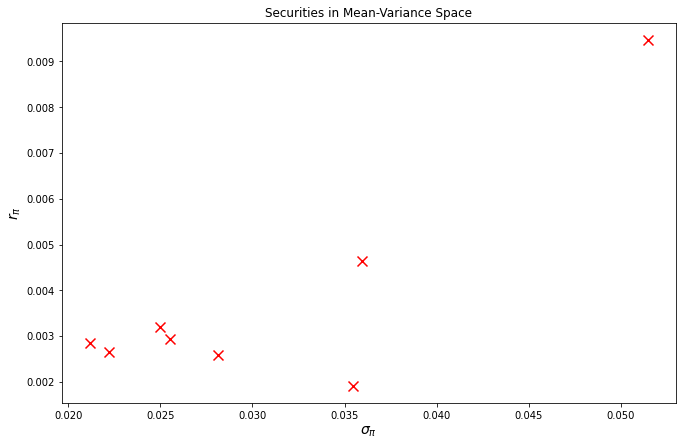

In [20]:
plt.title('Securities in Mean-Variance Space')
plt.scatter(np.sqrt(Σ).diagonal(), μ, marker='x', color='red', s=100)
plt.ylabel('$r_\pi$', size=14)
plt.xlabel('$\sigma_\pi$', size=14)
plt.show()


# Plotting the Efficient EfficientFrontier

In [21]:
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))

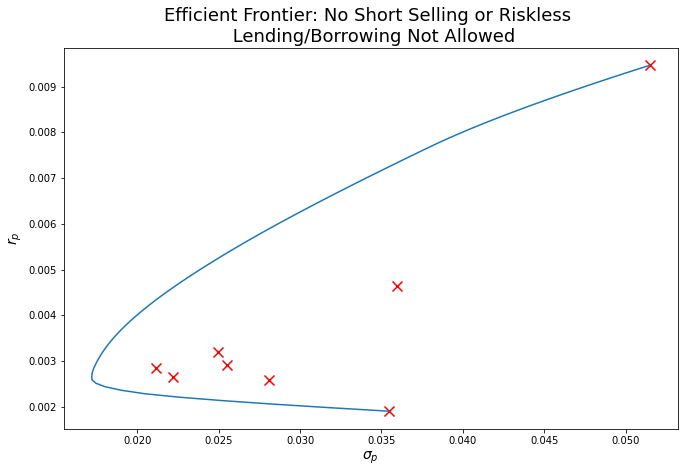

In [22]:
ef.plot_frontier(allow_shorts=False, allow_lending=False)